### Camera Calibration

8x6 real


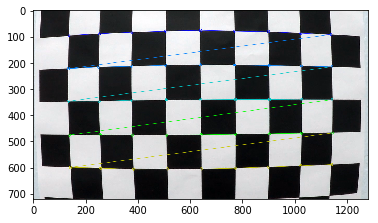

In [54]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# prepare object points
nx = 9#TODO: enter the number of inside corners in x
ny = 5#TODO: enter the number of inside corners in y

# Make a list of calibration images
fname = './camera_cal/calibration1.jpg'
img = cv2.imread(fname)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

img_points = []

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    img_points.append(corners)
    print('8x6 real')
else:
    ret, corners = cv2.findChessboardCorners(gray, (nx-1, ny), None)
    cv2.drawChessboardCorners(img, (nx-1, ny), corners, ret)
    img_points.append(corners)
    print('8x6')
    
    
    
    
    # add points to array
    #img_points.append(corners)
    #obj_points.append(objp)
    
plt.imshow(img)


In [ ]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved objpoints and imgpoints
#dist_pickle = pickle.load(open("wide_dist_pickle.p", "rb"))
#objpoints = dist_pickle["objpoints"]
#imgpoints = dist_pickle["imgpoints"]

# Read in an image
#img = cv2.imread('test_image.png')

# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and
# returns the undistorted image

'''
def cal_undistort(img, objpoints, imgpoints):

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Use cv2.calibrateCamera() and cv2.undistort()
    # undist = np.copy(img)  # Delete this line
    return undist


undistorted = cal_undistort(img, objpoints, imgpoints)
'''
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def camera_calibrate(img, nx=9, ny=6):
    
    # create array to hold corner coordinates in 2D points in original image plane
    img_points = []
    # create array to hold corner coordinates in world space
    obj_points = []
    
    # create a variable populated with zeros size of checkerboard grid
    objp = np.zeros((nx * ny, 3), np.float32)
    # reshape???
    objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # it corners are found
    if ret == True:
        # add 2D points to array
        img_points.append(corners)
        # add 3D points to array
        obj_points.append(objp)
        
        # draw detected corners onto image
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        
        #plt.imshow(img)
    
    return gray, img_points, obj_points
 

In [ ]:
def cal_undistort(img, objpoints, imgpoints):
    
    img_size = (img.shape[1], img.shape[0])

    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # calibrate camera image based on 2D points, and fit into 3D array
    #ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[::-1], None, None)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    # create a corrected image
    # create a corrected image
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # return corrected image
    return undist




In [ ]:
#location of test image
fname = 'calibration_test.png'
img = cv2.imread(fname)

gray_img, image_points, world_points = camera_calibrate(img,8,6)
corrected_img = cal_undistort(gray_img, world_points, image_points)
#undistorted = cal_undistort(img, objpoints, imgpoints)

plt.imshow(gray_img, cmap='gray');

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))
f.tight_layout()
ax1.imshow(gray_img, cmap='gray')
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(corrected_img, cmap='gray')
ax2.set_title('Corrected Image', fontsize=30)
plt.subplots_adjust(left=0.0, right=1.0, top=0.9, bottom=0.0)

In [63]:
# openCV implementation of camera calibration

import numpy as np
import cv2
import glob
# Import the `pyplot` module
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline


def camera_calibrate(nx=9, ny=6):
    
    # termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:ny,0:nx].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    obj_points = [] # 3d point in real world space
    img_points = [] # 2d points in image plane.
    count_points = []

    images = glob.glob('./camera_cal/*.jpg')

    # Fill out the subplots with sample of each images in dataset

    # explicitly set figure size
    fig = plt.figure(figsize=(40,80))
    
    i = 0
    
    for fname in images:
        # read in am image
        img = cv2.imread(fname)
        # create intance of image in grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        # If found, add object points, image points (after refining them)
        if ret == True:
            #objpoints.append(objp)

            corners2 = cv2.cornerSubPix(gray,corners,(5,5),(-1,-1),criteria)
            img_points.append(corners2)
            
            
            file_name = (fname.split('/')[-1])
            count_points.append(file_name)
            
            
            # add 2D points to array
            img_points.append(corners)
            # add 3D points to array
            obj_points.append(objp)
        
            # draw detected corners onto image
            #img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)

            # Draw and display the corners
            img = cv2.drawChessboardCorners(img, (nx,ny), corners2,ret)
            #plt.imshow(img)
            
            plt.subplot(10, 2, i+1)
            plt.axis('off')
            plt.imshow(img)
            # increase spacings between plots to stop any overlap
            #plt.subplots_adjust(wspace=0.1,hspace=0.1)
            i +=1
            #cv2.imshow('img',img)
            #cv2.waitKey(5)
            
            # create plot title from data name and count of data in each set
            title = "filename: {0}".format(fname)
            # add custom title to each plot
            plt.title(title, wrap=True)
        else:
            plt.subplot(10, 2, i+1)
            plt.axis('off')
            plt.imshow(img)
            i +=1
            title = "filename: {0}\n Could not detect {1}x{2} grid.".format(fname, nx, ny)
            plt.title(title, wrap=True)
            


    #cv2.destroyAllWindows()
    plt.show()
    
    print(count_points)

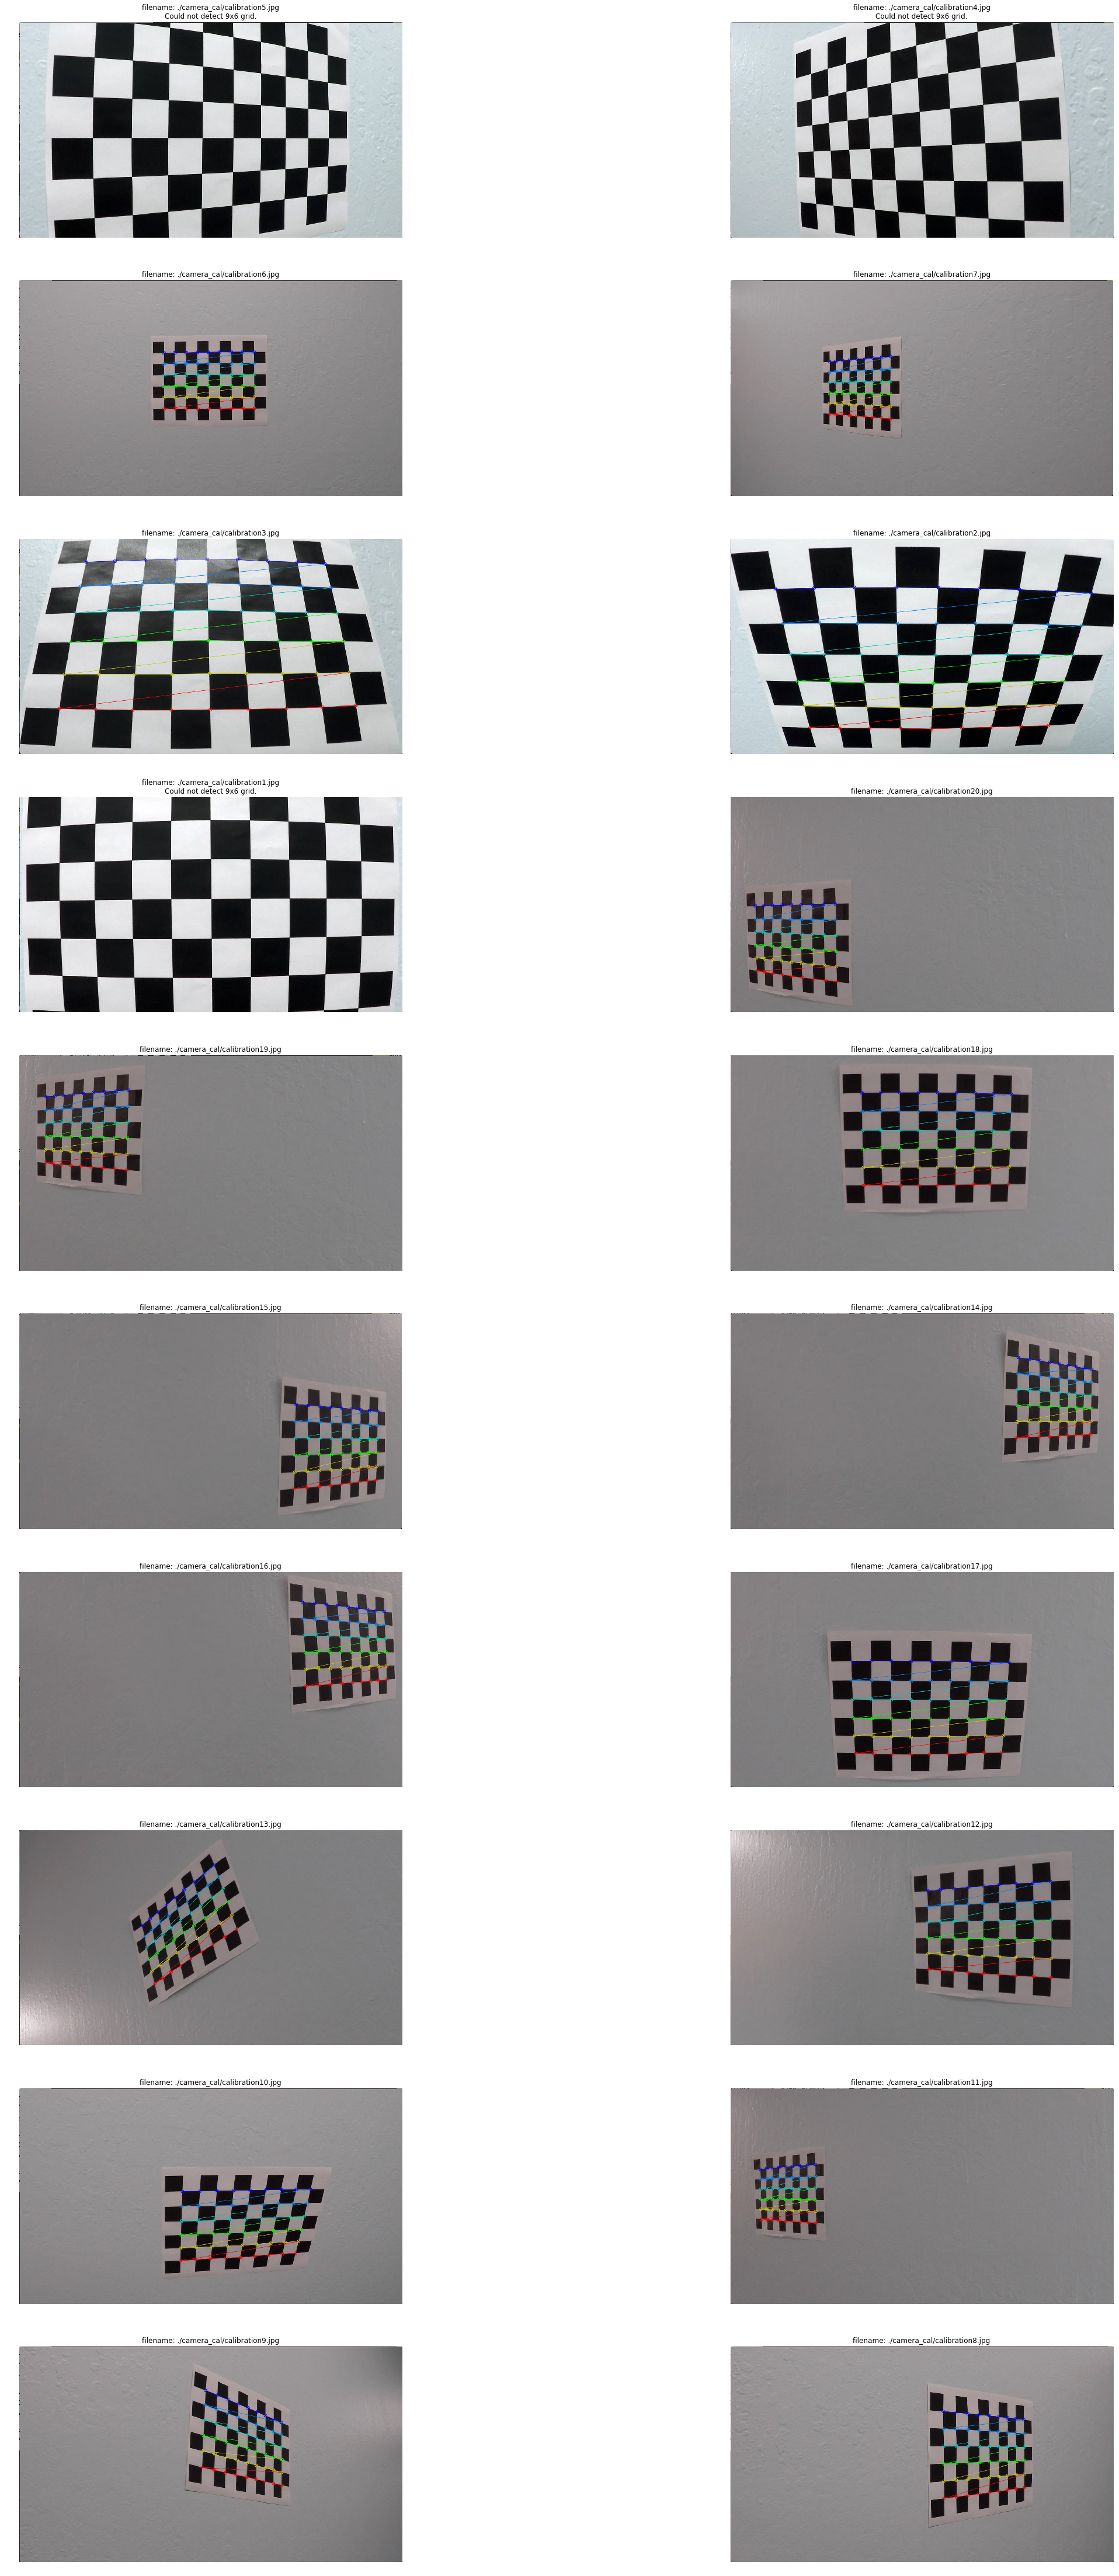

['calibration6.jpg', 'calibration7.jpg', 'calibration3.jpg', 'calibration2.jpg', 'calibration20.jpg', 'calibration19.jpg', 'calibration18.jpg', 'calibration15.jpg', 'calibration14.jpg', 'calibration16.jpg', 'calibration17.jpg', 'calibration13.jpg', 'calibration12.jpg', 'calibration10.jpg', 'calibration11.jpg', 'calibration9.jpg', 'calibration8.jpg']


In [64]:
camera_calibrate()